In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
url="https://raw.githubusercontent.com/JuanBecerra07/bootCAMP-DS_JUAN-BECERRA-/main/Actividad%201/healthcare_dataset.csv"
df=pd.read_csv(url,sep=',',encoding='utf-8')
df
!pip install statsmodels
import statsmodels.formula.api as sm
import os


In [3]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [18]:
New =df[['Blood Type','Gender','Age','Billing Amount','Medical Condition','Insurance Provider']]
Round=New['Billing Amount'].round(2).astype(int)
New['Billing Amount']=Round
New['Bill']=New['Billing Amount']
New['IP']=New['Insurance Provider']
New['BT']= New['Blood Type']
New['MC']= New['Medical Condition']
New.info()
New=New.drop(['Billing Amount','Blood Type','Insurance Provider','Medical Condition'],axis = 1)
###New=New.query("BT=='O+'")
New=New.query("IP=='Medicare'")
New

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Blood Type          10000 non-null  object
 1   Gender              10000 non-null  object
 2   Age                 10000 non-null  int64 
 3   Billing Amount      10000 non-null  int64 
 4   Medical Condition   10000 non-null  object
 5   Insurance Provider  10000 non-null  object
 6   Bill                10000 non-null  int64 
 7   IP                  10000 non-null  object
 8   BT                  10000 non-null  object
 9   MC                  10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


,Gender,Age,Bill,IP,BT,MC
0,Female,81,37490,Medicare,O-,Diabetes
2,Male,61,36874,Medicare,B-,Obesity
3,Male,49,23303,Medicare,B-,Asthma
11,Female,23,6185,Medicare,O-,Hypertension
17,Male,23,45213,Medicare,A+,Arthritis
...,...,...,...,...,...,...
9967,Male,27,47126,Medicare,O-,Cancer
9978,Female,46,4997,Medicare,AB+,Arthritis
9980,Female,71,47369,Medicare,A+,Cancer
9983,Male,74,1675,Medicare,AB-,Obesity


In [6]:
model1 = 'Bill~Age+MC+IP+BT+Gender'
lm1   = sm.ols(formula = model1, data = New).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bill   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.052
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.396
Time:                        22:08:01   Log-Likelihood:            -1.0970e+05
No. Observations:               10000   AIC:                         2.194e+05
Df Residuals:                    9981   BIC:                         2.196e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.51

In [7]:
model1 = 'Bill~Age '
lm1   = sm.ols(formula = model1, data = New).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bill   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8992
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.343
Time:                        22:08:01   Log-Likelihood:            -1.0970e+05
No. Observations:               10000   AIC:                         2.194e+05
Df Residuals:                    9998   BIC:                         2.194e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.587e+04    395.382     65.422      0.0

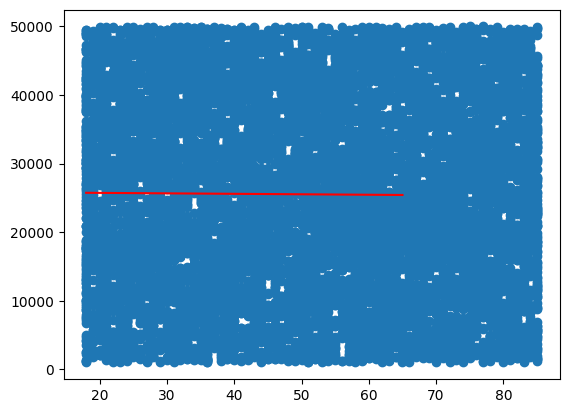

In [8]:
import warnings
warnings.filterwarnings("ignore")
pendiente=lm1.params[1]
intercepto=lm1.params[0]
pendiente,intercepto
import matplotlib.pyplot as plt 
x=np.arange(18,65+1,1)
y= intercepto + pendiente* x
plt.scatter(New.Age, New.Bill)
plt.plot(x,y, color='red')

In [9]:
!pip install scikit-learn
!pip install scipy


from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [20]:
Data = New.drop(['Gender','IP','MC','BT'],axis =1)
Data_feat=Data.values
Data_feat


array([[   81, 37490],
       [   61, 36874],
       [   49, 23303],
       ...,
       [   71, 47369],
       [   74,  1675],
       [   72, 37181]])

<Axes: xlabel='Age', ylabel='Bill'>

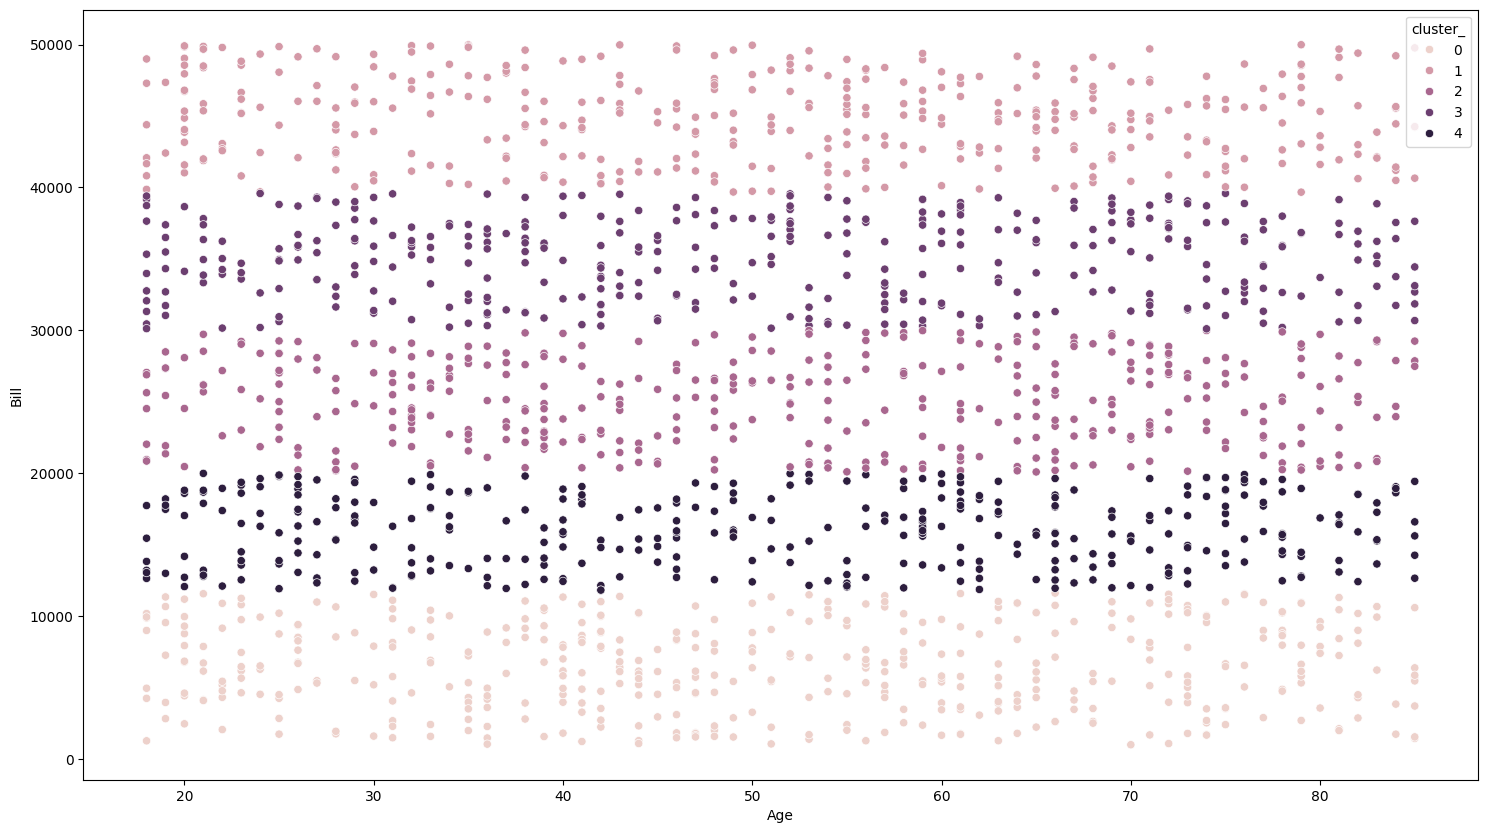

In [21]:
agglom = AgglomerativeClustering(n_clusters =5, linkage = 'complete',metric ="euclidean")
agglom.fit(Data_feat)
agglom.labels_
New['cluster_'] = agglom.labels_


plt.figure(figsize=(18,10))
sns.scatterplot(data=New, x='Age',y='Bill',hue='cluster_')


In [22]:
! pip install prince


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 9.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 21.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.9 MB/s eta 0:00:00


In [33]:
import prince
mca = prince.MCA(n_components= 2)
New =df[['Gender','Medical Condition','Insurance Provider']]
New




 

,Gender,Medical Condition,Insurance Provider
0,Female,Diabetes,Medicare
1,Male,Asthma,UnitedHealthcare
2,Male,Obesity,Medicare
3,Male,Asthma,Medicare
4,Male,Arthritis,UnitedHealthcare
...,...,...,...
9995,Male,Obesity,UnitedHealthcare
9996,Female,Arthritis,Blue Cross
9997,Male,Arthritis,Blue Cross
9998,Male,Arthritis,UnitedHealthcare


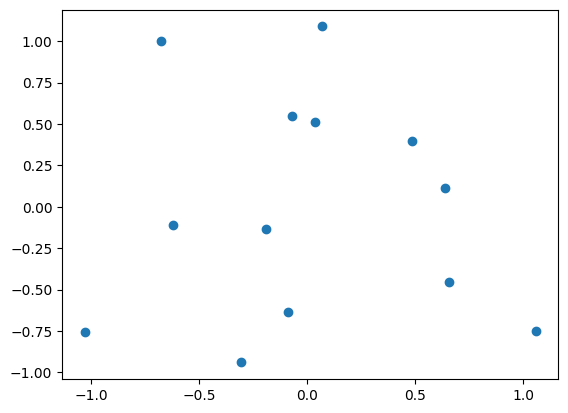

In [41]:
X=New
fig, ax = plt.subplots()
mca = prince.MCA(n_components=2).fit(X)
T=mca.column_coordinates(X)
T.columns = ['X','Y']
ax.scatter(T.X,T.Y)



In [45]:
T

,X,Y
Gender_Female,-0.621036,-0.107850
Gender_Male,0.639951,0.111135
Medical Condition_Arthritis,0.658651,-0.454061
Medical Condition_Asthma,0.484221,0.396917
Medical Condition_Cancer,-0.676188,1.003110
Medical Condition_Diabetes,-0.088401,-0.633663
Medical Condition_Hypertension,-0.069675,0.546844
Medical Condition_Obesity,-0.307855,-0.940828
Insurance Provider_Aetna,0.069004,1.089358
Insurance Provider_Blue Cross,1.057333,-0.751452
